<a href="https://colab.research.google.com/github/yadavrahyl2k15/started-_with_neural/blob/main/started_with_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist


In [ ]:
(train_image,train_label),(test_image,test_label)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
train_image.ndim

3

In [ ]:
train_image.shape

(60000, 28, 28)

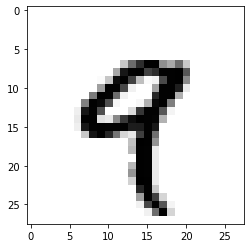

In [ ]:
digit=train_image[4]
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

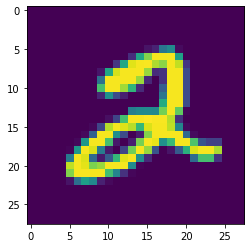

In [ ]:
digit=train_image[5]
plt.imshow(digit)
plt.show()

TESNOR SLICING

In [ ]:
my_slice=train_image[10:100,:,:]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice=train_image[10:1000,7:-7,7:-7]
my_slice.shape

(990, 14, 14)

TENSOR RESHAPING

In [ ]:
import numpy as np
x=np.array([[3,2,1,34],
            [45,67,56,67],
            [21,34,21,62]])
x.shape

(3, 4)

In [ ]:
x=x.reshape(12,1)
x

array([[ 3],
       [ 2],
       [ 1],
       [34],
       [45],
       [67],
       [56],
       [67],
       [21],
       [34],
       [21],
       [62]])

In [ ]:
x=x.reshape(4,3)
x

array([[ 3,  2,  1],
       [34, 45, 67],
       [56, 67, 21],
       [34, 21, 62]])

In [ ]:
x=np.transpose(x)
x.shape

(3, 4)

Classifying newswires:
a multiclass classification example

In [ ]:
from keras.datasets import reuters

In [ ]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
train_labels[10]

3

Decoding newswires back to text

In [ ]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_news= " ".join(reverse_word_index.get(i-3,'?') for i in train_data[0])

557056/550378 [==============================] - 0s 0us/step


In [ ]:
train_labels[10]

3

encoding data

In [ ]:
import numpy as np


In [ ]:
def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence]=1
  return results

In [ ]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [ ]:
def one_hot_coding(labels,dimension=46):
  results=np.zeros((len(labels),dimension))
  for i,label in enumerate(labels):
    results[i,label]=1
  return results

In [ ]:
one_hot_coding_train_label=one_hot_coding(train_labels)
one_hot_coding_test_label=one_hot_coding(test_labels)

In [ ]:
from keras.utils.np_utils import to_categorical
one_hot_coding_train_label= to_categorical(train_labels)
one_hot_coding_test_label= to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers

In [ ]:
model= models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

compiling the model

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

setting a validation set

In [ ]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=one_hot_coding_train_label[:1000]
partial_y_val=one_hot_coding_train_label[1000:]

Training the model

In [ ]:
history=model.fit(partial_x_train,partial_y_val,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 77ms/step - loss: 3.1094 - accuracy: 0.3829 - val_loss: 1.7149 - val_accuracy: 0.6460
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.4956 - accuracy: 0.6939 - val_loss: 1.2941 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 1.0707 - accuracy: 0.7750 - val_loss: 1.1281 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.8423 - accuracy: 0.8302 - val_loss: 1.0394 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6692 - accuracy: 0.8649 - val_loss: 0.9771 - val_accuracy: 0.8090
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.5399 - accuracy: 0.8906 - val_loss: 0.9397 - val_accuracy: 0.8170
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.4162 - accuracy: 0.9183 - val_loss: 0.9325 - val_accuracy: 0.8150
Epoch 8/20
16

In [ ]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting training and validation loss

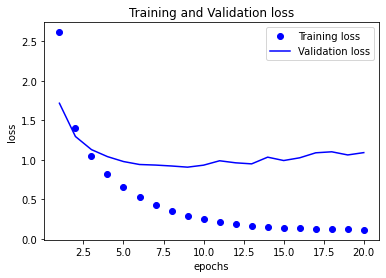

In [ ]:
import matplotlib.pyplot as plt

loss_value=history_dict['loss']
val_loss_value=history_dict['val_loss']

epochs=range(1,len(loss_value)+1)

plt.plot(epochs,loss_value,"bo",label='Training loss')
plt.plot(epochs,val_loss_value,"b",label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

Plotting Training and Validation Accuracy

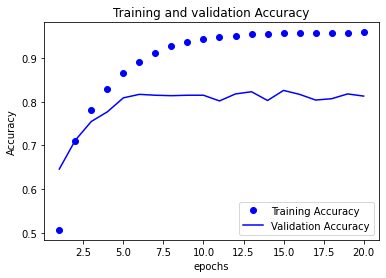

In [ ]:
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
plt.plot(epochs,acc_values,'bo',label='Training Accuracy')
plt.plot(epochs,val_acc_values,"b",label="Validation Accuracy")
plt.xlabel("epochs")
plt.ylabel('Accuracy')
plt.title("Training and validation Accuracy")
plt.legend()
plt.show()


The network begins to overfit after nine epochs. Let’s train a new network from
scratch for nine epochs and then evaluate it on the test set.

Retraining the model again

In [ ]:
model.fit(partial_x_train,partial_y_val,epochs=9,batch_size=512,validation_data=(x_val,y_val))
result=model.evaluate(x_test,one_hot_coding_test_label)

Epoch 1/9
16/16 [==============================] - 1s 67ms/step - loss: 0.0929 - accuracy: 0.9583 - val_loss: 1.3103 - val_accuracy: 0.7900
Epoch 2/9
16/16 [==============================] - 1s 61ms/step - loss: 0.0979 - accuracy: 0.9568 - val_loss: 1.3263 - val_accuracy: 0.7920
Epoch 3/9
16/16 [==============================] - 1s 61ms/step - loss: 0.0930 - accuracy: 0.9587 - val_loss: 1.2325 - val_accuracy: 0.8070
Epoch 4/9
16/16 [==============================] - 1s 62ms/step - loss: 0.0925 - accuracy: 0.9593 - val_loss: 1.2771 - val_accuracy: 0.8050
Epoch 5/9
16/16 [==============================] - 1s 65ms/step - loss: 0.0913 - accuracy: 0.9575 - val_loss: 1.2895 - val_accuracy: 0.8060
Epoch 6/9
16/16 [==============================] - 1s 62ms/step - loss: 0.0913 - accuracy: 0.9582 - val_loss: 1.2631 - val_accuracy: 0.8050
Epoch 7/9
16/16 [==============================] - 1s 63ms/step - loss: 0.0905 - accuracy: 0.9599 - val_loss: 1.2663 - val_accuracy: 0.8080
Epoch 8/9
16/16 [===

In [ ]:
result

[1.5019484758377075, 0.7804986834526062]

This approach reaches an accuracy of ~80%

In [ ]:
predictions=model.predict(x_test)
predictions

array([[3.09657850e-07, 1.23687255e-06, 4.01401543e-08, ...,
        8.25050805e-10, 1.81968732e-14, 7.20746796e-11],
       [3.14582826e-06, 3.95128503e-02, 5.87470413e-06, ...,
        4.12168717e-08, 8.74110155e-16, 8.55991006e-01],
       [3.28053231e-03, 9.59912837e-01, 8.07998440e-05, ...,
        8.50394208e-05, 3.32509775e-09, 4.65740050e-06],
       ...,
       [9.59532329e-08, 4.99012572e-07, 3.93580279e-08, ...,
        4.27758167e-08, 2.72824940e-11, 1.64911140e-11],
       [1.38886673e-02, 1.22381277e-01, 2.82521010e-03, ...,
        2.17651657e-04, 2.40525605e-06, 1.19595325e-05],
       [3.14428726e-05, 9.91186082e-01, 1.02635749e-04, ...,
        4.74609533e-06, 1.39127529e-10, 8.68517844e-08]], dtype=float32)

In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.argmax(predictions[0])

3

In [ ]:
np.sum(predictions[0])

1.0000001

# Boston Housing Price dataset

In [ ]:
from keras.datasets import boston_housing

In [ ]:
(train_data,train_target),(test_data,test_target)=boston_housing.load_data()
train_data.shape

57344/57026 [==============================] - 0s 0us/step


(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_data.shape[1]

13

Normalizing the data

In [ ]:
mean=train_data.mean(axis=0)
train_data -=mean
std=train_data.std(axis=0)
train_data/=std


In [ ]:
test_data -=mean
test_data /=std

In [ ]:
test_data

array([[ 1.55369355, -0.48361547,  1.0283258 , ...,  0.78447637,
        -3.48459553,  2.25092074],
       [-0.39242675, -0.48361547, -0.16087773, ..., -0.30759583,
         0.42733126,  0.47880119],
       [-0.39982927, -0.48361547, -0.86940196, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [-0.20709507, -0.48361547,  1.24588095, ..., -1.71818909,
         0.37051949, -1.49344089],
       [-0.36698601, -0.48361547, -0.72093526, ..., -0.48960787,
         0.39275481, -0.41829982],
       [-0.0889679 , -0.48361547,  1.24588095, ..., -1.71818909,
        -1.21946544, -0.40449827]])

Model definition


In [ ]:
from keras import models
from keras import layers
def build_model():
  model=models.Sequential()
  model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics='mae')
  return model

k-fold validation 

In [ ]:
import numpy as np


In [ ]:
k=4
num_val_scores=len(train_data)//k
num_epochs=100
all_scores=[]

In [ ]:
for i in range(k):
  print("processing fold #",i)
  val_data=train_data[i*num_val_scores:(i+1)*num_val_scores]
  val_targets=train_target[i*num_val_scores:(i+1)*num_val_scores]

  partial_train_data=np.concatenate([train_data[:i*num_val_scores],train_data[(i+1)*num_val_scores:]],axis=0)
  partial_train_targets=np.concatenate([train_target[:i*num_val_scores],train_target[(i+1)*num_val_scores:]],axis=0)
  model=build_model()
  model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=1,verbose=0)

  val_mse,val_mae=model.evaluate(val_data,val_targets,verbose=0)
  all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
all_scores

[1.9356105327606201, 2.4411163330078125, 2.733860492706299, 2.279463291168213]

In [ ]:
np.mean(all_scores)

2.347512662410736

Saving validation logs at each fold

In [ ]:
num_epochs=500
all_mae_histories=[]

for i in range(k):
  print("processing fold #",i)
  val_data=train_data[i*num_val_scores:(i+1)*num_val_scores]
  val_targets=train_target[i*num_val_scores:(i+1)*num_val_scores]

  partial_train_data=np.concatenate([train_data[:i*num_val_scores],train_data[(i+1)*num_val_scores:]],axis=0)
  partial_train_targets=np.concatenate([train_target[:i*num_val_scores],train_target[(i+1)*num_val_scores:]],axis=0)
  model=build_model()
  history=model.fit(partial_train_data,partial_train_targets,validation_data=(val_data,val_targets),epochs=num_epochs,batch_size=1,verbose=0)
  history_dict=history.history
  history_dict.keys()
  mae_history=history_dict['val_mae']
  all_mae_histories.append(mae_history)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
average_mae_history=[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_history

[4.280164182186127,
 3.1927722692489624,
 3.121696412563324,
 2.8267722725868225,
 2.6911107301712036,
 2.57515811920166,
 2.588045358657837,
 2.506911337375641,
 2.4572519063949585,
 2.498741328716278,
 2.5304121375083923,
 2.5518710613250732,
 2.7210700511932373,
 2.425392210483551,
 2.4291886687278748,
 2.4122796654701233,
 2.503518968820572,
 2.5361186861991882,
 2.373350501060486,
 2.415020704269409,
 2.397537112236023,
 2.4404075145721436,
 2.4262571334838867,
 2.5089573562145233,
 2.315752327442169,
 2.525688111782074,
 2.3317922949790955,
 2.667008340358734,
 2.3778809905052185,
 2.4323359727859497,
 2.3351319432258606,
 2.641908586025238,
 2.373665004968643,
 2.323085069656372,
 2.315745323896408,
 2.426032781600952,
 2.386130839586258,
 2.319049447774887,
 2.3842094242572784,
 2.2662493288517,
 2.299059718847275,
 2.3776634335517883,
 2.2279320657253265,
 2.33605420589447,
 2.2626851201057434,
 2.314371645450592,
 2.326907515525818,
 2.350640207529068,
 2.2068817019462585,
 2

plotting validation score

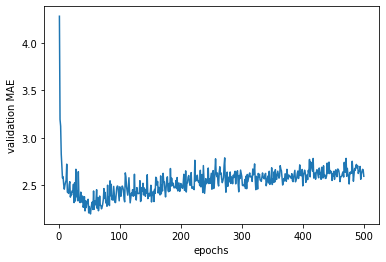

In [ ]:
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel("epochs")
plt.ylabel("validation MAE")
plt.show()

Plotting validation scores excluding first 10 datasets

In [ ]:
def smooth_curve(points,factor=0.9):
  smoothed_points=[]
  for point in points:
    if smoothed_points:
      previous=smoothed_points[-1]
      smoothed_points.append(previous*factor + point*(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
     

In [ ]:
smooth_mae_history=smooth_curve(average_mae_history[10:])


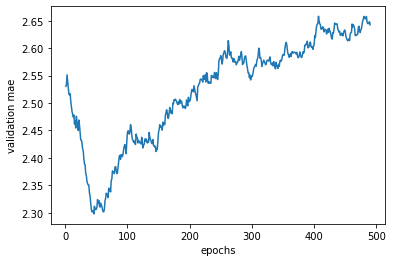

In [ ]:
plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel("epochs")
plt.ylabel("validation mae")
plt.show()

Training the final model

In [ ]:
model=build_model()
model.fit(train_data,train_target,epochs=80,batch_size=16,verbose=0)
test_mse_score,test_mae_score=model.evaluate(test_data,test_target)

4/4 [==============================] - 0s 3ms/step - loss: 14.3468 - mae: 2.5272
